## ANALISIS DE DATOS SOBRE IRIS
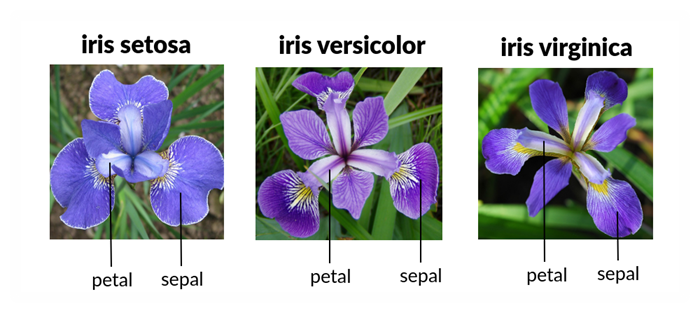

Estos conjunto de datos consisten en 3 tipos: Setosa, Versicolor y virginica.

El conjunto de datos flor Iris o conjunto de datos iris de Fisher es un conjunto de datos multivariante introducido por Ronald Fisher en su artículo de 1936

El conjunto de datos contiene 150 muestras, cada una de las cuales se caracteriza por 4 características: longitud del sépalo (en cm), ancho del sépalo (en cm), longitud del pétalo (en cm), y ancho del pétalo (en cm).

El uso de mediciones multiples en problemas taxonomicos como por ejemplo de analisis discriminante lineal.

|Variable|Rol|Tipo|Descripcion|Unidades|Missing|
|-----|------|------|------|------|-----|
|Sepal Length|Feature|Continua|longitud del sepalo|cm|no|
|sepal width|Feature|Continua|Anchura del Petalo|cm|no|
|petal length|Feature|Continua|longitud del petalo|cm|no|
|Petal width|Feature|Continua|anchura del petalo|cm|no|
|class|Target|Continua|Clase de iris: Setosa,Versicolor,virginica|0,1,2|no|

# PREPARACION Y CRAGA DE DATOS

In [1]:
# Librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
variables = pd.DataFrame(data['data'],columns =data['feature_names'])

In [5]:
variables['Clase'] = data['target']

In [6]:
variables['Clase'].replace({0:'setosa',1:'versicolor',2:'virginica'}, inplace=True)
variables.to_parquet('iris_Abdon.parquet',index=False) # Guardar DataFrame

C:\Users\Abdon.RAMIREZ-BRICEN\AppData\Local\Temp\ipykernel_41340\2825088635.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  variables['Clase'].replace({0:'setosa',1:'versicolor',2:'virginica'}, inplace=True)


In [7]:
df = pd.read_parquet('iris_Abdon.parquet')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Clase              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Clase                0
dtype: int64

In [10]:
df[df.duplicated(keep=False)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Clase
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


### Observaciones

- No hay nulos.
- Hay un duplicado, pero podemos asumir que es por la escala o proporcion.
- Tipos de datos estan correctos.

### Limpieza y preprocesado

#### Preprocesado

**Feature Engineer**

In [11]:
df['area sepal (cm2)'] = df['sepal length (cm)'] *df['sepal width (cm)']
df['area petal(cm2)'] = df['petal length (cm)'] *df['petal width (cm)']

In [12]:
clase = df['Clase']

In [13]:
df.pop('Clase')

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Clase, Length: 150, dtype: object

In [14]:
df['clase'] = clase

In [15]:
df = df[['sepal length (cm)','sepal width (cm)','area sepal (cm2)',
         'petal length (cm)','petal width (cm)','area petal(cm2)','clase']]

In [16]:
df

,sepal length (cm),sepal width (cm),area sepal (cm2),petal length (cm),petal width (cm),area petal(cm2),clase
0,5.1,3.5,17.85,1.4,0.2,0.28,setosa
1,4.9,3.0,14.70,1.4,0.2,0.28,setosa
2,4.7,3.2,15.04,1.3,0.2,0.26,setosa
3,4.6,3.1,14.26,1.5,0.2,0.30,setosa
4,5.0,3.6,18.00,1.4,0.2,0.28,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,20.10,5.2,2.3,11.96,virginica
146,6.3,2.5,15.75,5.0,1.9,9.50,virginica
147,6.5,3.0,19.50,5.2,2.0,10.40,virginica
148,6.2,3.4,21.08,5.4,2.3,12.42,virginica


In [17]:
df.describe()

,sepal length (cm),sepal width (cm),area sepal (cm2),petal length (cm),petal width (cm),area petal(cm2)
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,17.822867,3.758000,1.199333,5.794067
std,0.828066,0.435866,3.361854,1.765298,0.762238,4.712390
min,4.300000,2.000000,10.000000,1.000000,0.100000,0.110000
25%,5.100000,2.800000,15.660000,1.600000,0.300000,0.420000
50%,5.800000,3.000000,17.660000,4.350000,1.300000,5.615000
75%,6.400000,3.300000,20.325000,5.100000,1.800000,9.690000
max,7.900000,4.400000,30.020000,6.900000,2.500000,15.870000


In [18]:
df['clase'].value_counts(normalize=True)*100

clase
setosa        33.333333
versicolor    33.333333
virginica     33.333333
Name: proportion, dtype: float64

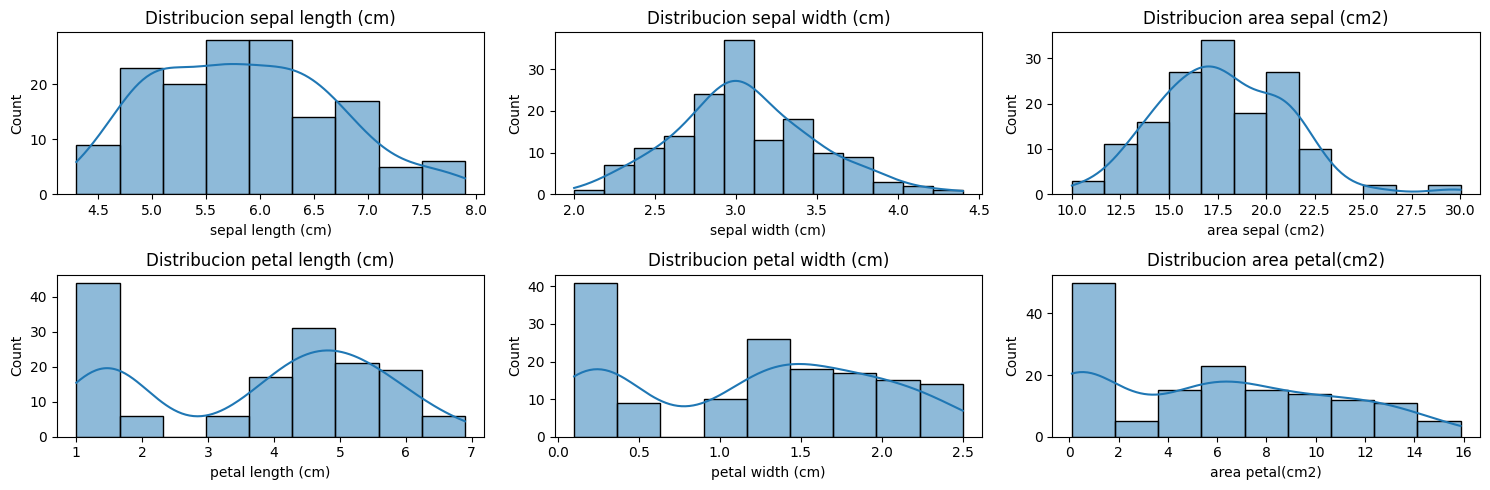

In [19]:
plt.figure(figsize=(15,5))

for i, col in enumerate(df.select_dtypes(include='number')):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df, x=col,kde=True)
    plt.title(f'Distribucion {col}')


plt.tight_layout()
plt.show();

## ANALIISIS EXPLORATORIO

In [20]:
df

,sepal length (cm),sepal width (cm),area sepal (cm2),petal length (cm),petal width (cm),area petal(cm2),clase
0,5.1,3.5,17.85,1.4,0.2,0.28,setosa
1,4.9,3.0,14.70,1.4,0.2,0.28,setosa
2,4.7,3.2,15.04,1.3,0.2,0.26,setosa
3,4.6,3.1,14.26,1.5,0.2,0.30,setosa
4,5.0,3.6,18.00,1.4,0.2,0.28,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,20.10,5.2,2.3,11.96,virginica
146,6.3,2.5,15.75,5.0,1.9,9.50,virginica
147,6.5,3.0,19.50,5.2,2.0,10.40,virginica
148,6.2,3.4,21.08,5.4,2.3,12.42,virginica


<Figure size 1500x500 with 0 Axes>

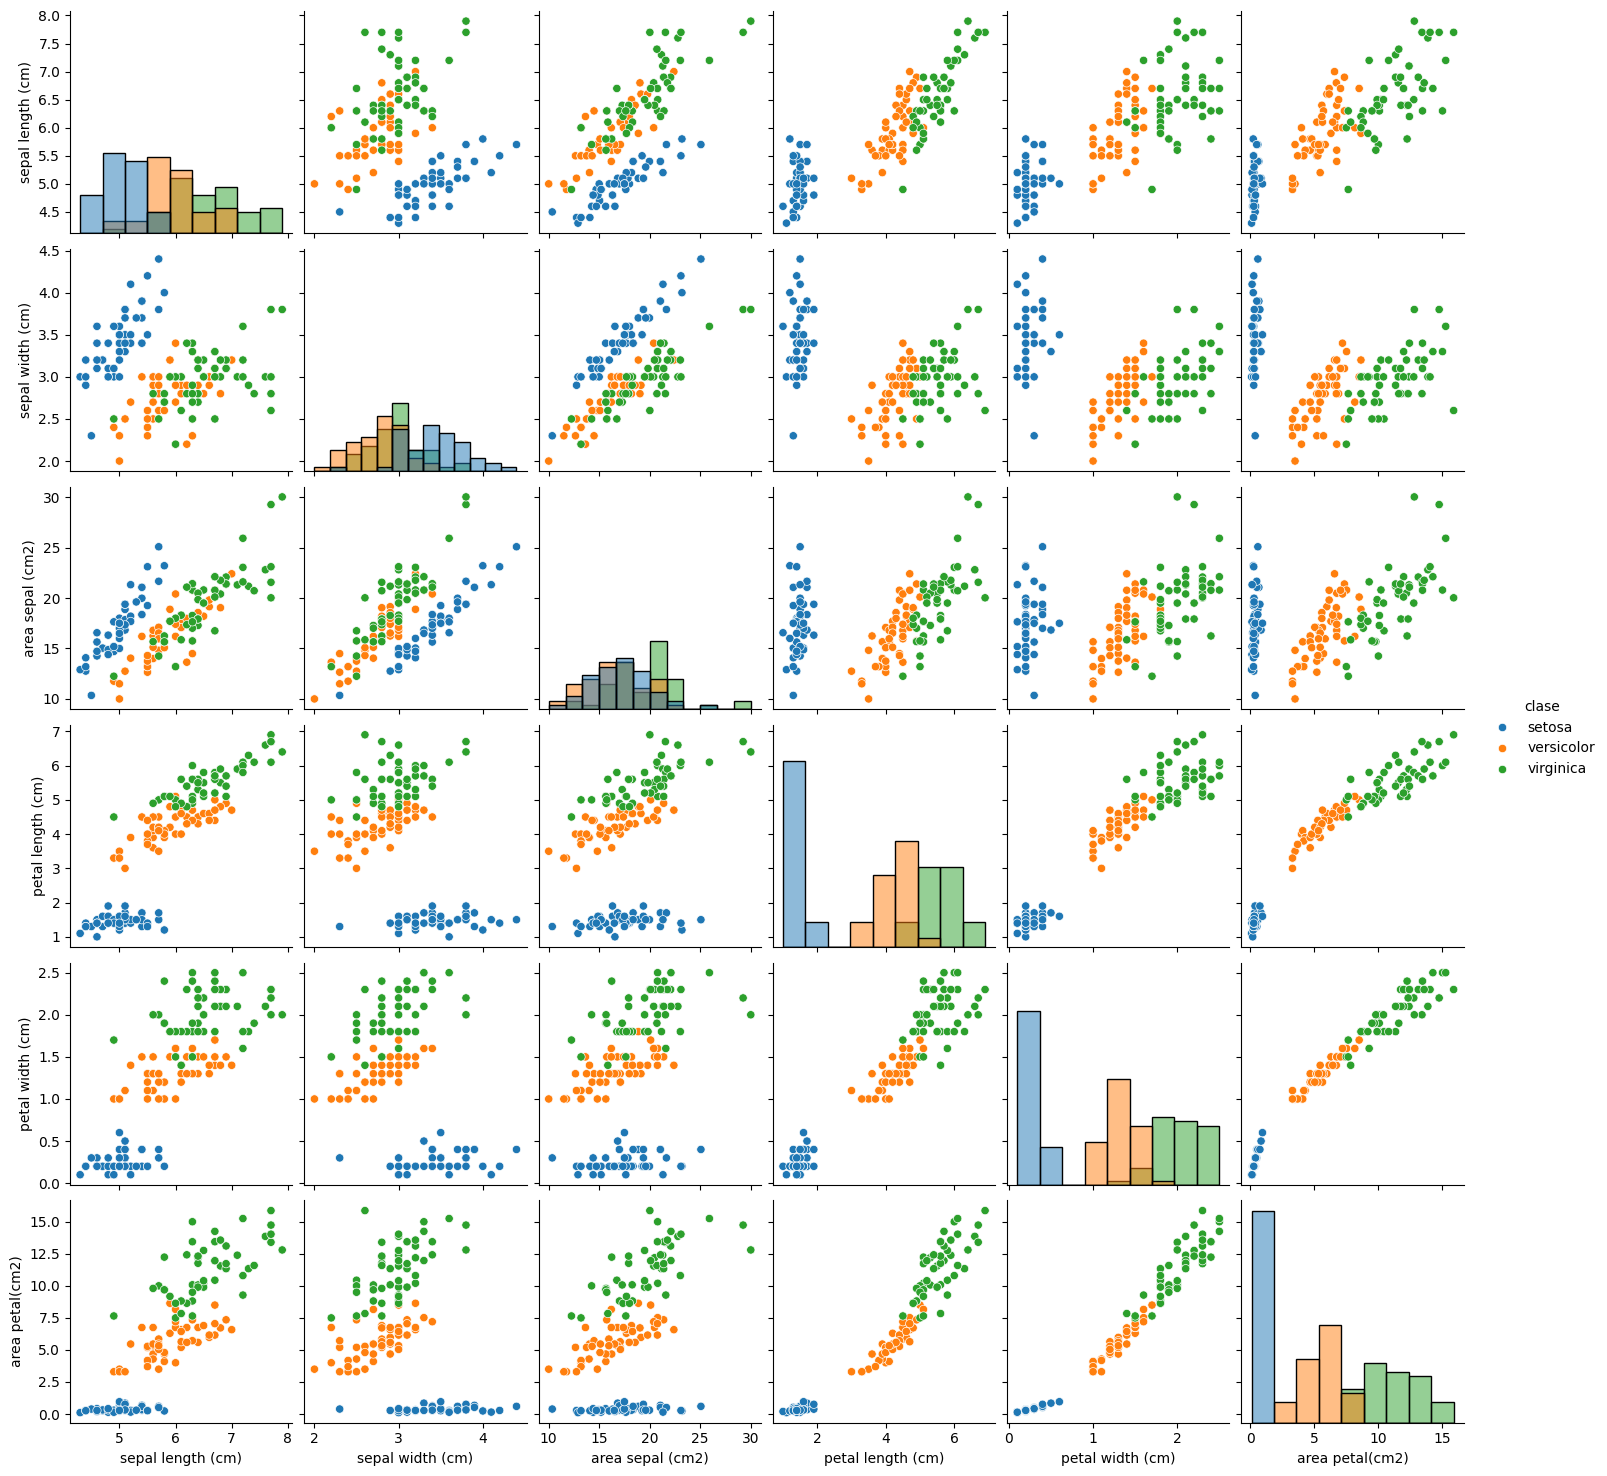

In [22]:
plt.figure(figsize=(15,5));

sns.pairplot(df,hue='clase',diag_kind='hist');

In [30]:
feature = ['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)','area petal(cm2)']
target = ['clase']

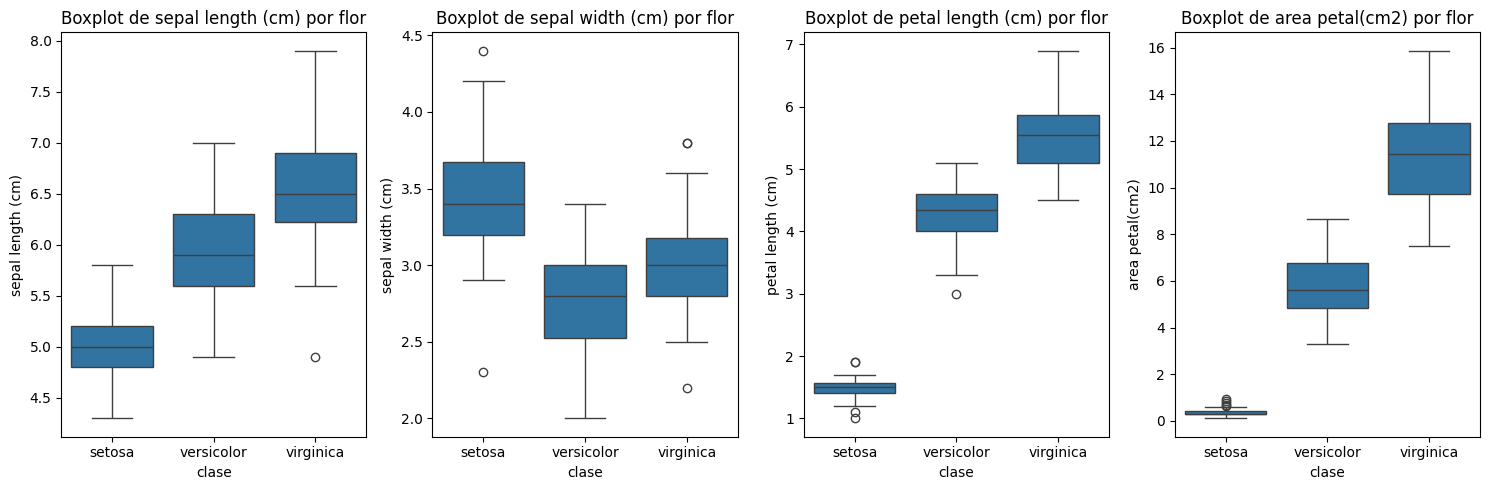

In [31]:
plt.figure(figsize=(15,5))
for i,col in enumerate(df[feature].columns):
    plt.subplot(1,4,i+1)
    sns.boxplot(data=df, x='clase', y=col)
    plt.title(f'Boxplot de {col} por flor')
plt.tight_layout()
plt.show();

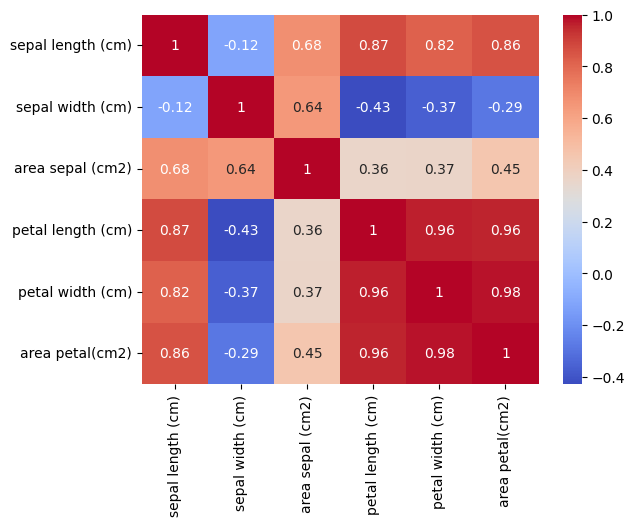

In [35]:
sns.heatmap(data=df.drop(columns='clase').corr(),annot=True,cmap='coolwarm');

## Hallazgos
 - Existe clara separacion entre: Setosa y las otras dos Flores
 - Versicolor y virginica muestran cierto solapamiento
 - Existe una fuerte correlacion entre largo y ancho de petalos
 - La flor setosa tiene petalos notablemente mas pequeños.

## Analisis diagnostico.

## Analisis de separabilida de flores

In [40]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'area sepal (cm2)',
       'petal length (cm)', 'petal width (cm)', 'area petal(cm2)', 'clase',
       'sepal_ratio', 'petal_ratio'],
      dtype='object')

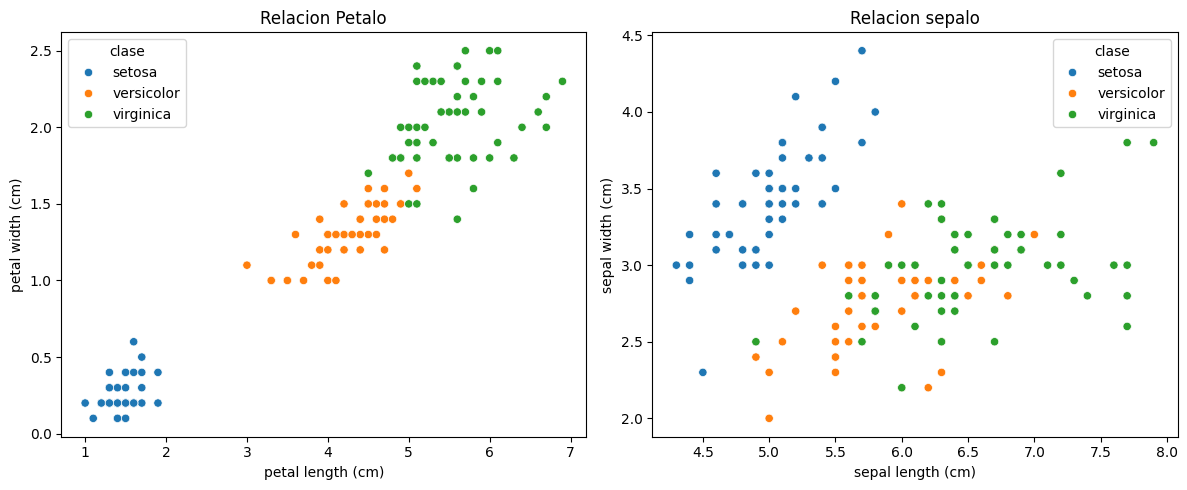

In [41]:
plt.figure(figsize=(12,5))

# Realcion de petalo

plt.subplot(1,2,1)
sns.scatterplot(data=df,x='petal length (cm)',y='petal width (cm)',hue='clase')
plt.title('Relacion Petalo')

# Realcion de sepalo

plt.subplot(1,2,2)
sns.scatterplot(data=df,x='sepal length (cm)',y='sepal width (cm)',hue='clase')
plt.title('Relacion sepalo')

plt.tight_layout()
plt.show();

<Axes: xlabel='clase', ylabel='petal_ratio'>

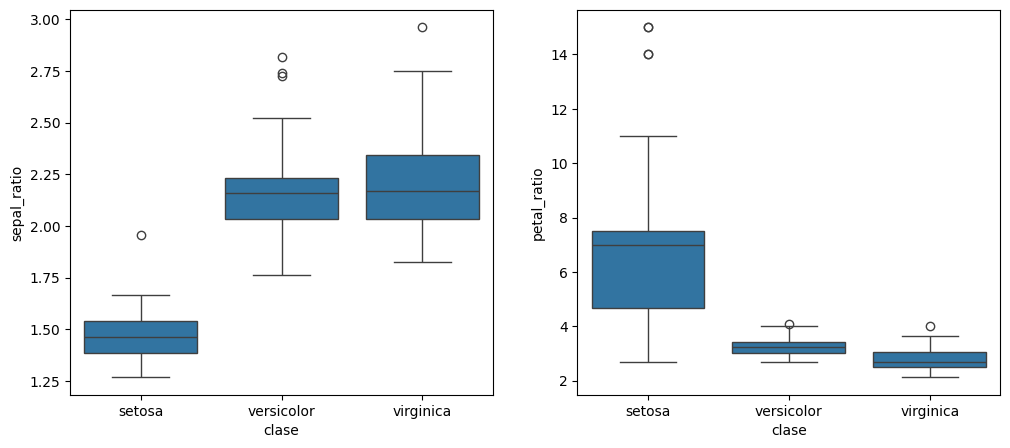

In [42]:
# analisis de ratios
df['sepal_ratio'] = df['sepal length (cm)'] / df['sepal width (cm)']
df['petal_ratio'] = df['petal length (cm)'] / df['petal width (cm)']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='clase',y='sepal_ratio')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='clase',y='petal_ratio')
